### Task 1 (10 points): Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.



#### Machine learning problem description:

The machine learning problem I wanted to solve was to classify breast cancer tumors as malignant or benign based on various characteristics ('mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'). This problem is often addressed in the field of medical diagnostics, where the goal is to help medical professionals distinguish between cancerous and non-cancerous tumors.

#### Why choose Logistic Regression:

**[1] Binary classification**: Logistic Regression is well suited to binary classification tasks, so it is suitable for predicting whether a tumor is malignant (1) or benign (0).

**[2] Interpretability**: In medical applications, interpretability is crucial. The coefficients provided by Logistic Regression are easy to interpret and medical professionals can understand the impact of each feature on the likelihood of malignancy.


**[3] Probability output**: The Logistic Regression model provides the probability that an instance belongs to a particular class. This probabilistic nature allows appropriate decision thresholds to be set, and the costs of false and missed positives may differ in medical decisions


### Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will use to solve this problem. You must provide a link to the dataset and perform the necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link : https://www.geeksforgeeks.org/top-8-python-libraries-fordata-visualization/ ).

**[1] Histograms of Feature Distributions:**

**Steps**:
Loop through each feature in the breast cancer dataset.
Plot histograms of the feature values using seaborn.

**Justification:**
This step helps visualize the distribution of individual features. Understanding the distribution is essential for identifying potential outliers, detecting skewness, and gaining insights into the overall data structure.


 
**[2] Boxplot of Feature Distributions:**

**Steps:**
Create a boxplot for each feature in the breast cancer dataset using seaborn.

**Justification:**
Boxplots provide a concise summary of the distribution, helping identify potential outliers and understand the spread of values for each feature.

**[3] Checking for Missing Values**:

**Steps:**
Convert the breast cancer dataset to a Pandas DataFrame.
Check for missing values in the DataFrame.
We find the cancer data contains no missing values

**Justification:**
Detecting missing values is crucial for understanding data quality. If there were missing values, specific techniques (like imputation or removal) might be necessary to handle them.



**[4] Correlation Heatmap:**

**Steps:**
Calculate the correlation matrix of features in the breast cancer dataset.
Visualize the correlation matrix using a heatmap.

**Justification:**
Understanding feature correlations is important for feature selection and multicollinearity analysis. A heatmap provides an intuitive representation of the relationships between different features.

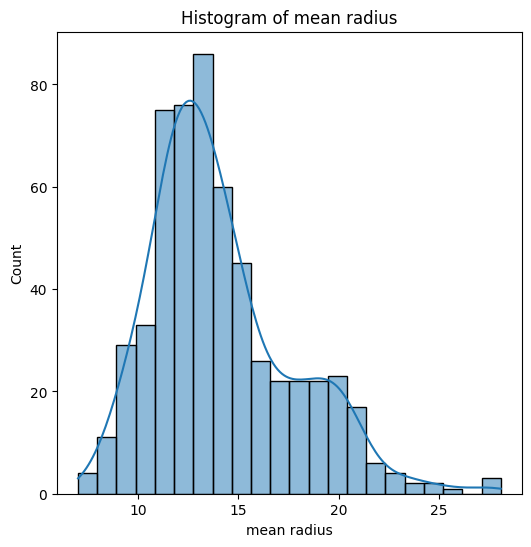

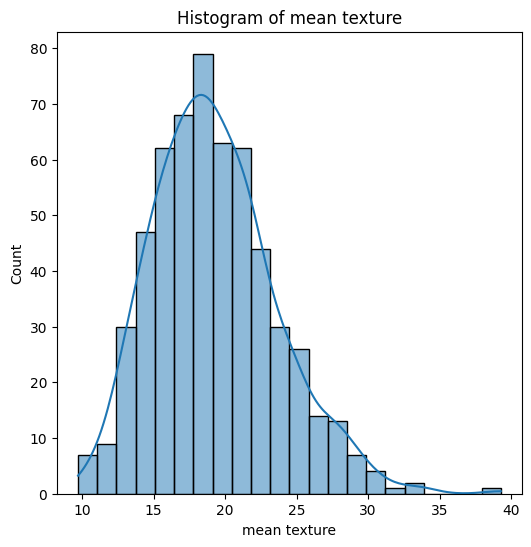

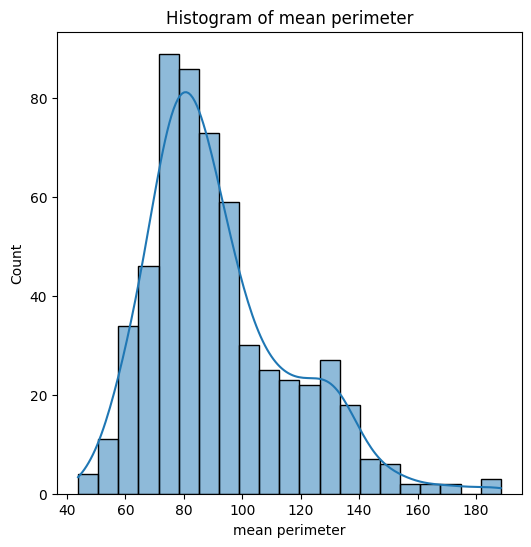

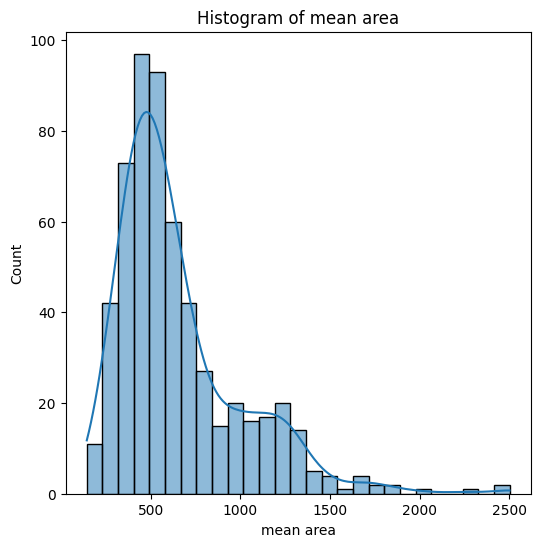

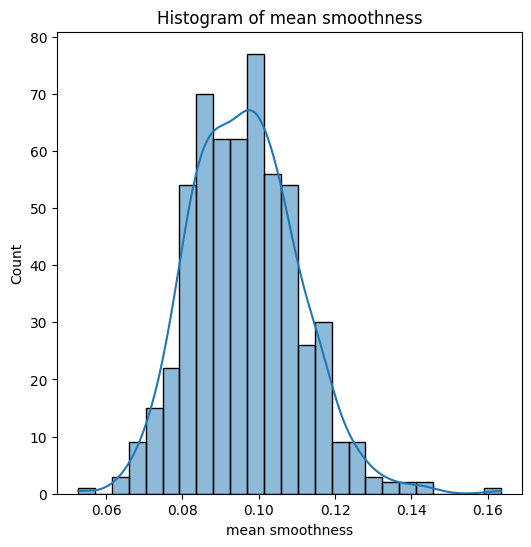

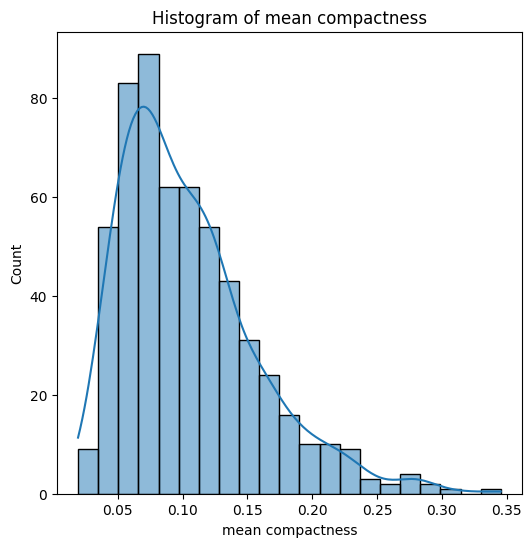

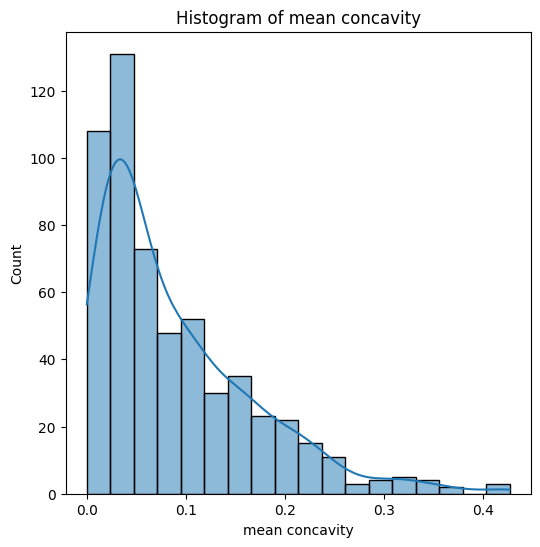

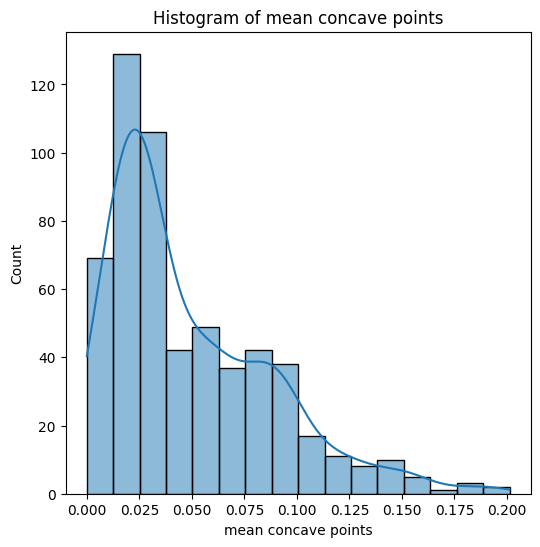

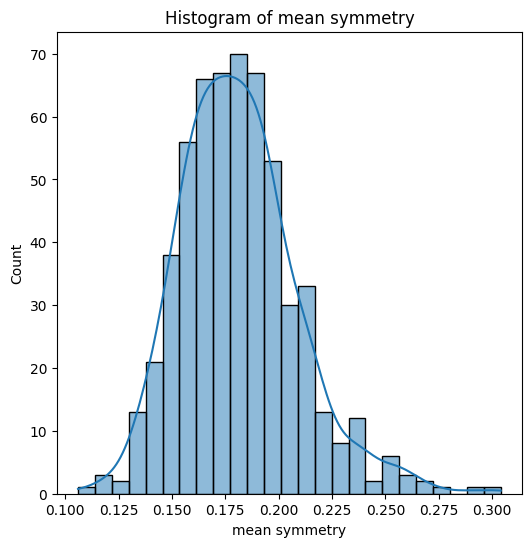

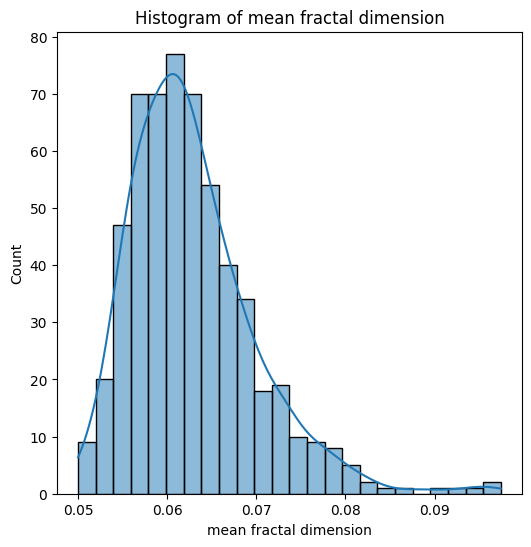

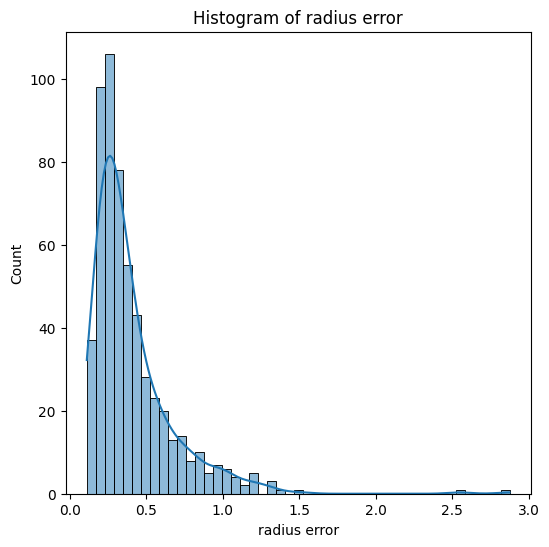

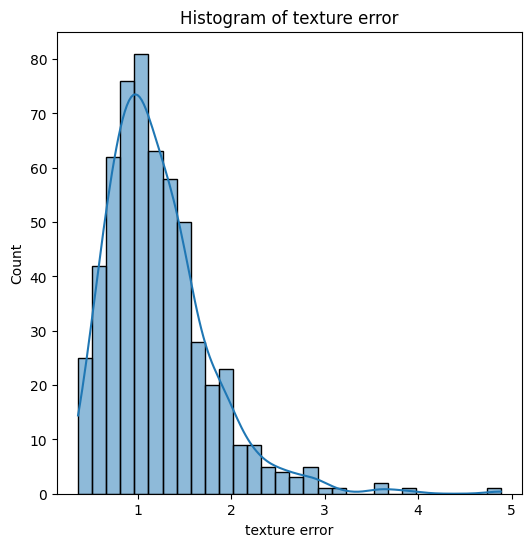

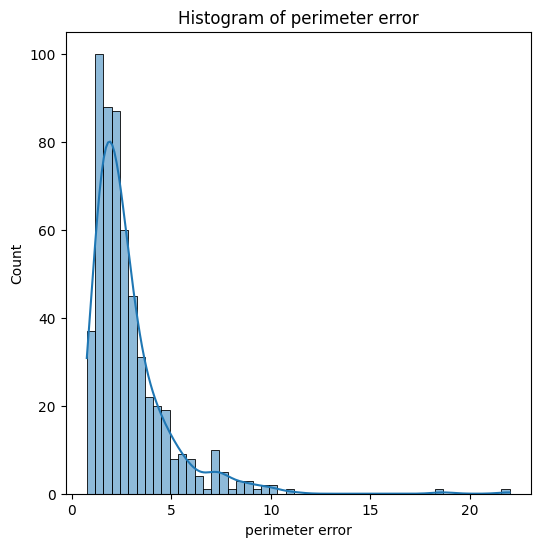

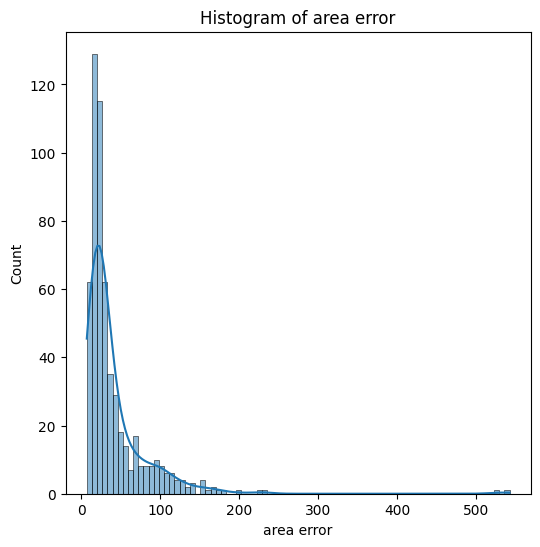

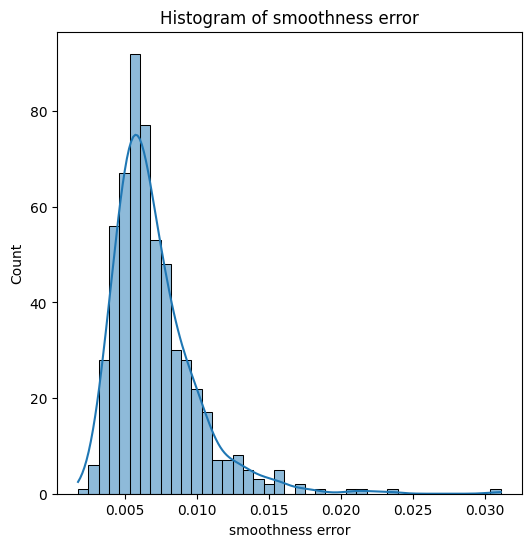

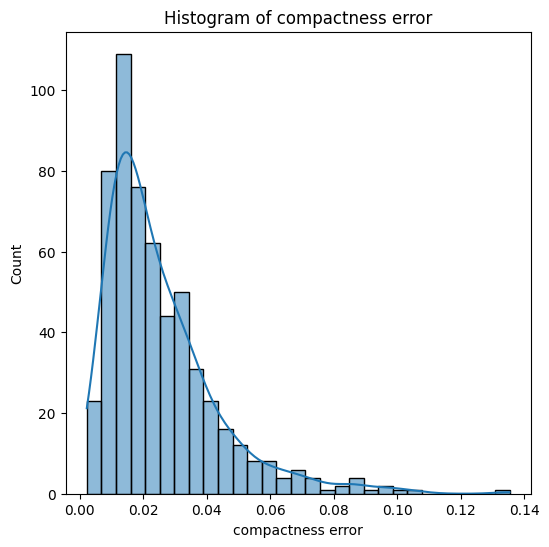

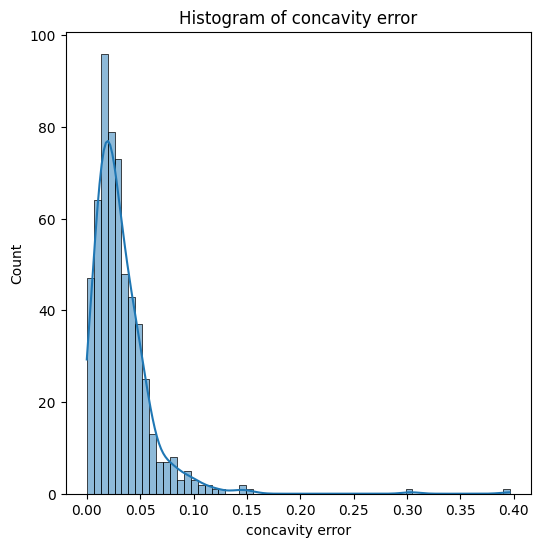

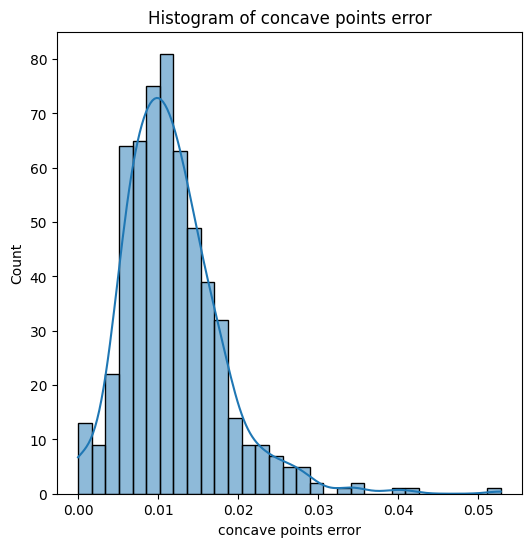

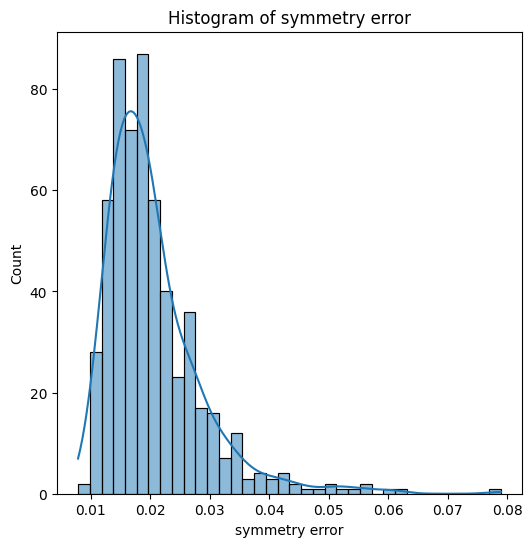

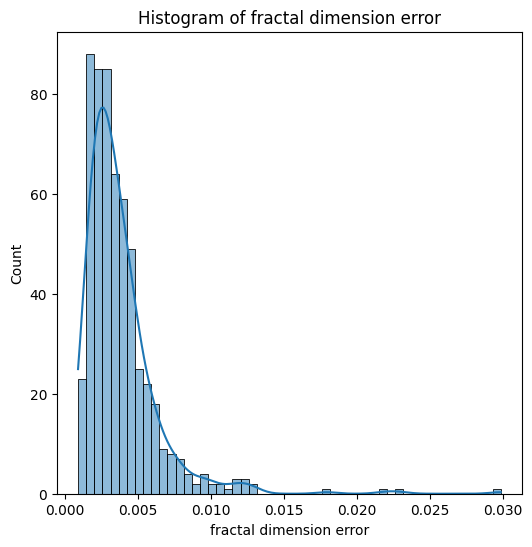

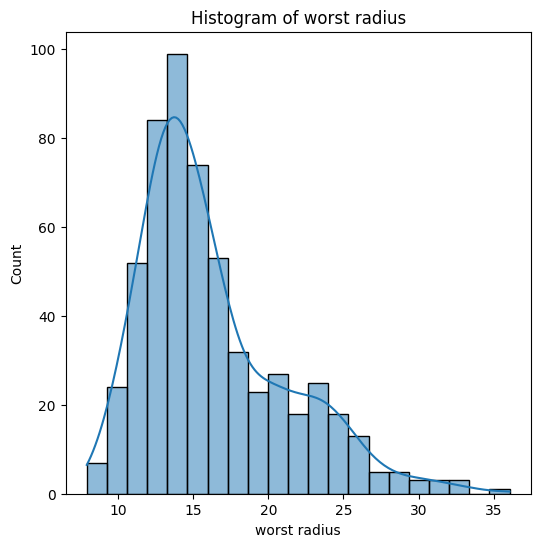

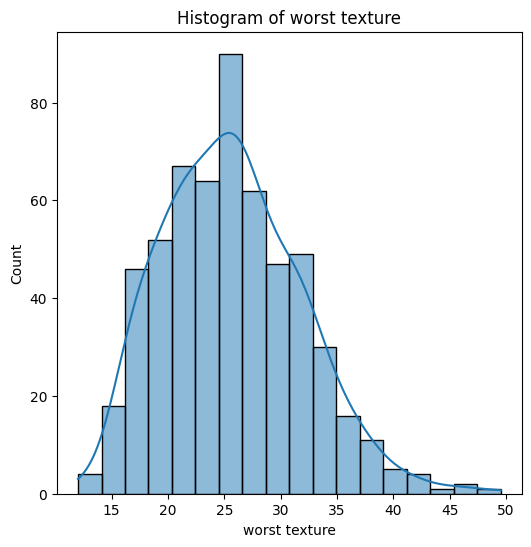

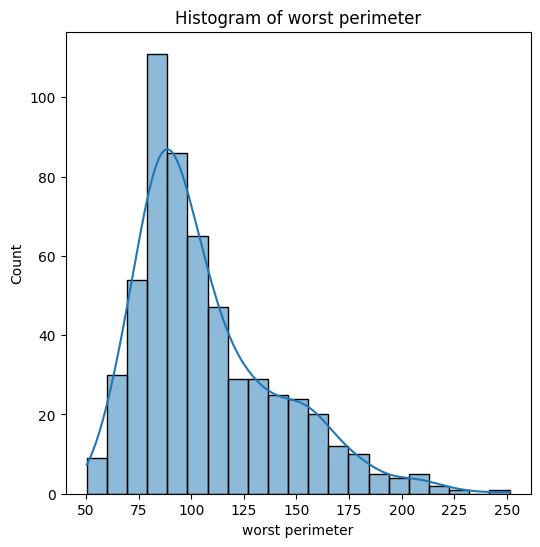

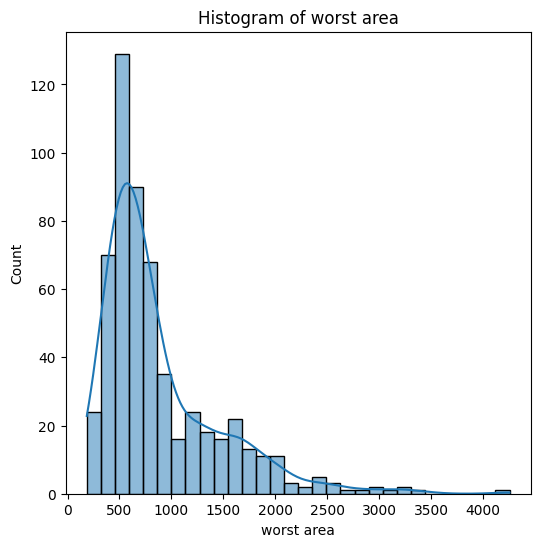

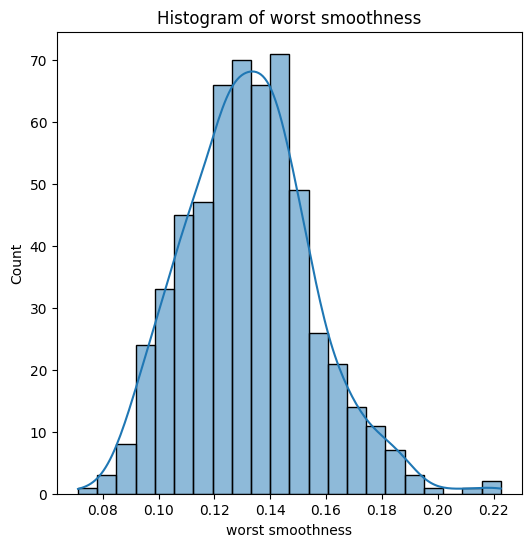

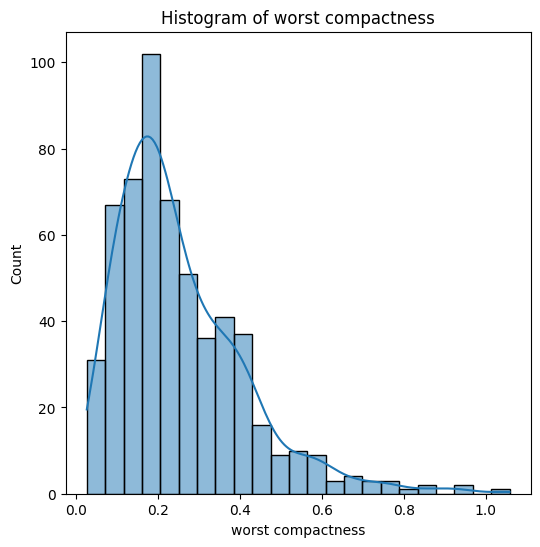

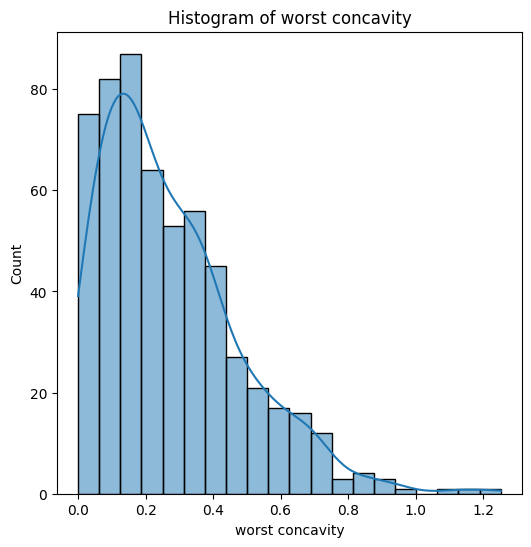

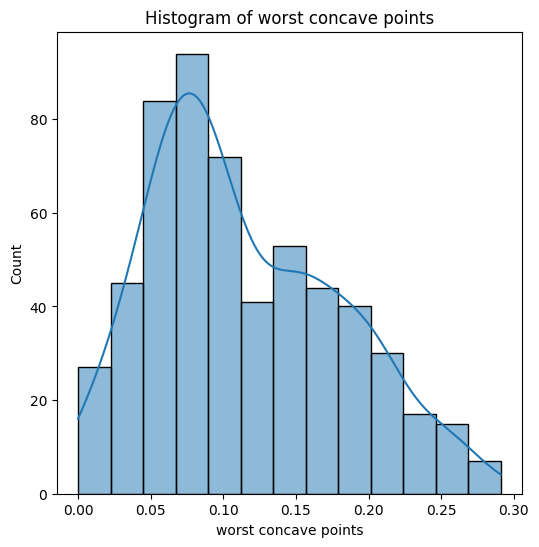

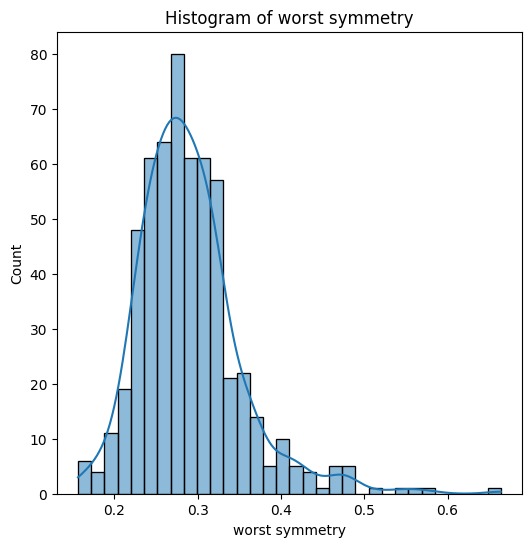

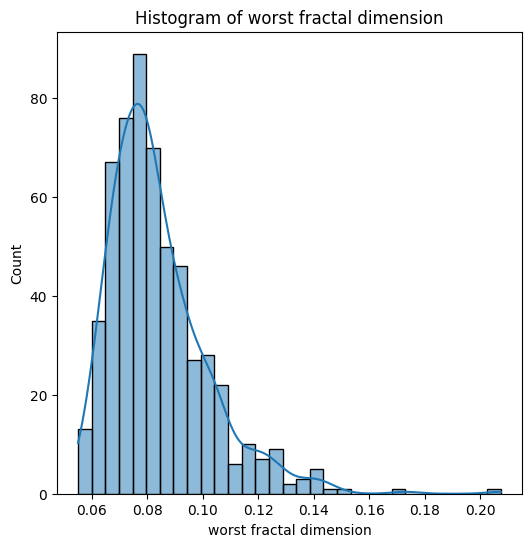

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer_data=load_breast_cancer()

for i, feature_name in enumerate(cancer_data.feature_names):
    plt.figure(figsize=(6, 6))
    sns.histplot(cancer_data.data[:, i], kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.title("Histogram of {}".format(feature_name))
    plt.show()

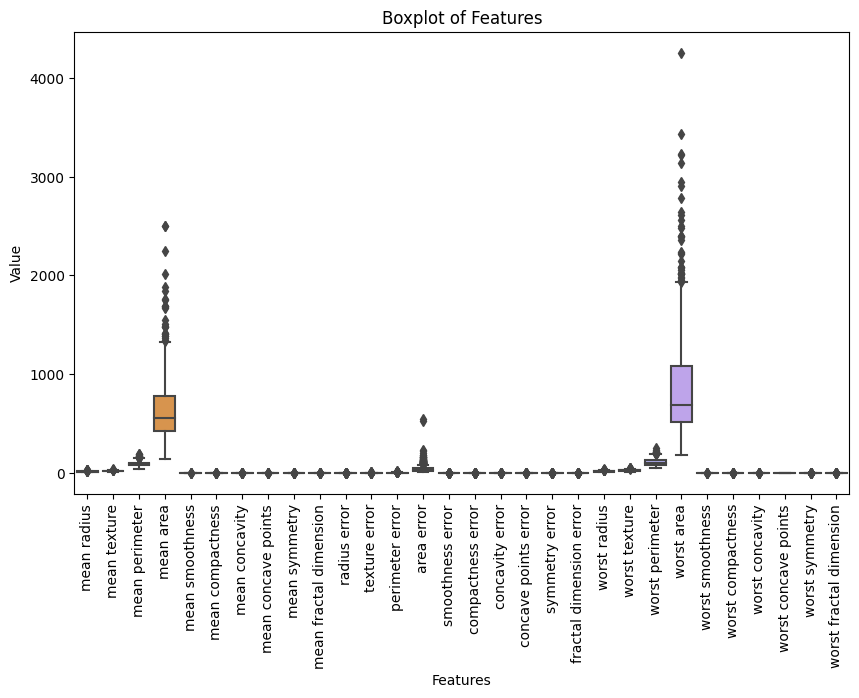

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cancer_data.data, orient="v")
plt.xticks(range(len(cancer_data.feature_names)), cancer_data.feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Boxplot of Features")
plt.show()


In [3]:
import pandas as pd
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

print("The number of missing values：")
print(df.isnull().sum())

The number of missing values：
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


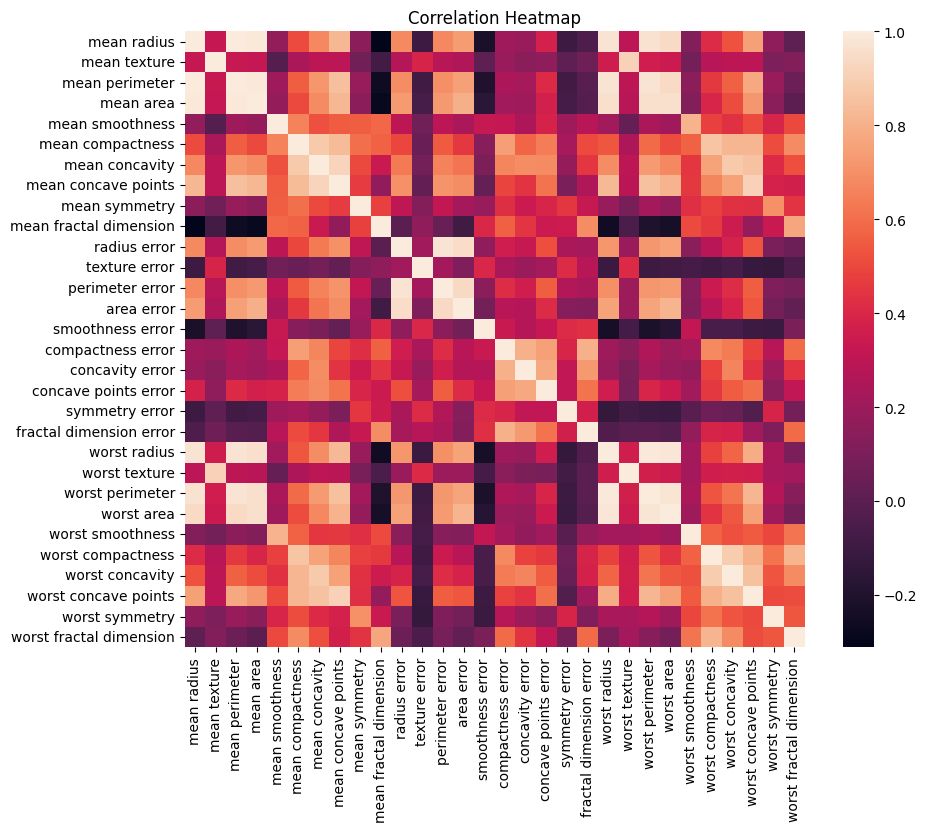

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()

### Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class).

In [5]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, variant='batch'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.variant = variant

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_pred):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        return cost

    def fit_batch_gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def fit_stochastic_gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(m):
                xi = X[i, :].reshape(1, -1)
                yi = y[i]

                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(z)

                dw = xi.T.dot(y_pred - yi)
                db = (y_pred - yi)

                self.weights -= self.learning_rate * dw.flatten()
                self.bias -= self.learning_rate * db

    def fit(self, X, y):
        if self.variant == 'batch':
            self.fit_batch_gradient_descent(X, y)
        elif self.variant == 'stochastic':
            self.fit_stochastic_gradient_descent(X, y)
        else:
            raise ValueError("Invalid variant. Choose 'batch' or 'stochastic'.")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=cancer_data.data
y=cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Instantiate Logistic Regression model with Gradient Descent
model = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='batch')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_gd = np.sum(y_pred == y_test) / len(y_test)
print("Test Accuracy (GD):", accuracy_gd)


# Instantiate Logistic Regression model with Stochastic Gradient Descent
model = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='stochastic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_sgd = np.sum(y_pred == y_test) / len(y_test)
print("Test Accuracy (SGD):", accuracy_sgd)

Test Accuracy (GD): 0.935672514619883
Test Accuracy (SGD): 0.9298245614035088


### Task 4 (45 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a  package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why we should or why we should not use optimization algorithms for the task at hand. For comparison of these algorithms define an evaluation metric appropriate for your problem. (For more on evaluation metrics check this link: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html )

In [8]:
import numpy as np

class LogisticRegressionWithOptimization:
    def __init__(self, learning_rate=0.01, num_iterations=1000, variant='batch', beta=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.variant = variant
        self.beta = beta
        self.epsilon = epsilon
        self.momentum = 0
        self.v = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_pred):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        return cost

    def fit_batch_gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def fit_stochastic_gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(m):
                xi = X[i, :].reshape(1, -1)
                yi = y[i]

                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(z)

                dw = xi.T.dot(y_pred - yi)
                db = (y_pred - yi)

                self.weights -= self.learning_rate * dw.flatten()
                self.bias -= self.learning_rate * db

    def fit_sgd_with_momentum(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(m):
                xi = X[i, :].reshape(1, -1)
                yi = y[i]

                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(z)

                dw = xi.T.dot(y_pred - yi)
                db = (y_pred - yi)

                # Momentum update
                self.momentum = self.beta * self.momentum + (1 - self.beta) * dw.flatten()
                self.weights -= self.learning_rate * self.momentum
                self.bias -= self.learning_rate * db

    def fit_adam(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(1, self.num_iterations + 1):
            for i in range(m):
                xi = X[i, :].reshape(1, -1)
                yi = y[i]

                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(z)

                dw = xi.T.dot(y_pred - yi)
                db = (y_pred - yi)

                # Adam update
                self.momentum = self.beta * self.momentum + (1 - self.beta) * dw.flatten()
                self.v = self.beta * self.v + (1 - self.beta) * (dw.flatten() ** 2)
                m_hat = self.momentum / (1 - np.power(self.beta, epoch))
                v_hat = self.v / (1 - np.power(self.beta, epoch))
                self.weights -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
                self.bias -= self.learning_rate * db

    def fit(self, X, y):
        if self.variant == 'batch':
            self.fit_batch_gradient_descent(X, y)
        elif self.variant == 'stochastic':
            self.fit_stochastic_gradient_descent(X, y)
        elif self.variant == 'sgd_with_momentum':
            self.fit_sgd_with_momentum(X, y)
        elif self.variant == 'adam':
            self.fit_adam(X, y)
        else:
            raise ValueError("Invalid variant. Choose 'batch', 'stochastic', 'sgd_with_momentum', or 'adam'.")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]

    

In [14]:
# Instantiate Logistic Regression model with Stochastic Gradient Descent and Momentum
model_sgd_with_momentum = LogisticRegressionWithOptimization(
    learning_rate=0.01, num_iterations=1000, variant='sgd_with_momentum', beta=0.9
)

# Train the model using Stochastic Gradient Descent with Momentum
model_sgd_with_momentum.fit(X_train, y_train)

# Make predictions
y_pred_sgd_with_momentum = model_sgd_with_momentum.predict(X_test)

# Evaluate the model
accuracy_momentum = np.sum(y_pred_sgd_with_momentum == y_test) / len(y_test)
print("Test Accuracy (SGD with Momentum):", accuracy_momentum)

# Instantiate Logistic Regression model with Adam
model_adam = LogisticRegressionWithOptimization(
    learning_rate=0.01, num_iterations=1000, variant='adam', beta=0.9
)

# Train the model using Adam
model_adam.fit(X_train, y_train)

# Make predictions
y_pred_adam = model_adam.predict(X_test)

# Evaluate the model
accuracy_adam = np.sum(y_pred_adam == y_test) / len(y_test)
print("Test Accuracy (Adam):", accuracy_adam)


Test Accuracy (SGD with Momentum): 0.9064327485380117
Test Accuracy (Adam): 0.8713450292397661


In [15]:
df_result=pd.DataFrame()

df_result['name']=['LR wth SGD','LR wth GD', 'LR with Momentum Optimization', 'LR with Adam Optimization']
df_result['test_accuracy']=[accuracy_sgd,accuracy_gd,accuracy_momentum, accuracy_adam]
df_result

,name,test_accuracy
0,LR wth SGD,0.929825
1,LR wth GD,0.935673
2,LR with Momentum Optimization,0.906433
3,LR with Adam Optimization,0.871345


From the test accuracy above we can see that the test accuracies of models using optimization algorithms (SGD, GD with Momentum, Adam) are slightly lower than the model with plain GD in this specific case. This is because the breast cancer dataset may not be extremely complex or have a high-dimensional feature space, leading to optimization algorithms providing limited benefits compared to plain GD.